<a href="https://colab.research.google.com/github/allnes/age_classifier/blob/master/exp_may/pga_hard_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect to Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
age_classifier	LICENSE.txt  rcv1.ipynb        summaries
checkpoints	makefile     README.md	       trials
lib		nips2016     requirements.txt  usage.ipynb
From https://github.com/allnes/cnn_graph
 * branch            graph_train -> FETCH_HEAD
Already up to date.
['arr_0', 'arr_1']
(729, 16384)
(729,)
--> Reshape data


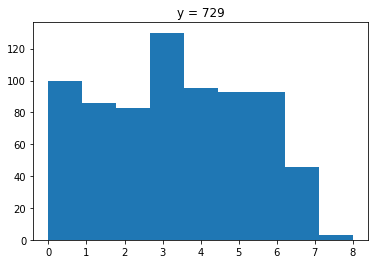

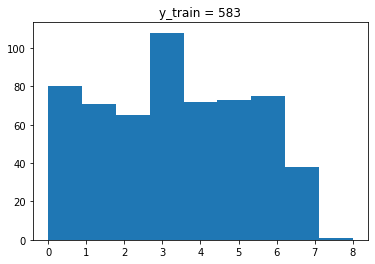

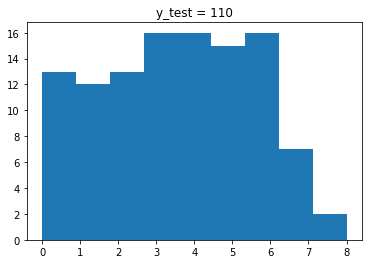

[0 1 2 3 4 5 6 7 8]
--> Get distance graph
d = |V| = 128, k|V| < |E| = 110250


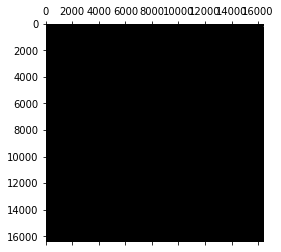

--> Get laplacian matrix
Layer 0: M_0 = |V| = 30648 nodes (14264 added),|E| = 55125 edges
Layer 1: M_1 = |V| = 15324 nodes (6373 added),|E| = 27953 edges
Layer 2: M_2 = |V| = 7662 nodes (1756 added),|E| = 20026 edges
Layer 3: M_3 = |V| = 3831 nodes (0 added),|E| = 13635 edges
(583, 30648)
(36, 30648)
(110, 30648)
NN architecture
  input: M_0 = 30648
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 30648 * 32 / 4 = 245184
    weights: F_0 * F_1 * K_1 = 1 * 32 * 16 = 512
    biases: M_1 * F_1 = 30648 * 32 = 980736
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 7662 * 32 / 2 = 122592
    weights: F_1 * F_2 * K_2 = 32 * 32 * 16 = 16384
    biases: M_2 * F_2 = 7662 * 32 = 245184
  layer 3: fc1
    representation: M_3 = 2000
    weights: M_2 * M_3 = 122592 * 2000 = 245184000
    biases: M_3 = 2000
  layer 4: logits (softmax)
    representation: M_4 = 9
    weights: M_3 * M_4 = 2000 * 9 = 18000
    biases: M_4 = 9







Instructions for updating:
Please use `rate` instead o

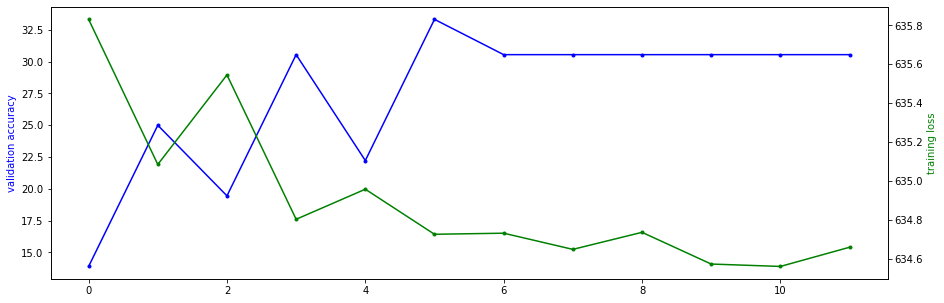

Time per step: 1040.61 ms
(110, 30648) (110,)
############ Class 0
(13, 30648)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 76.92 (10 / 13), f1 (weighted): 86.96, loss: 5.85e+02
time: 6s (wall 2s)
############ Class 1
(12, 30648)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 16.67 (2 / 12), f1 (weighted): 28.57, loss: 6.34e+02
time: 6s (wall 2s)
############ Class 2
(13, 30648)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 0.00 (0 / 13), f1 (weighted): 0.00, loss: 5.86e+02
time: 6s (wall 2s)
############ Class 3
(16, 30648)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 18.75 (3 / 16), f1 (weighted): 31.58, loss:

In [3]:
%tensorflow_version 1.x

from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/')
!ls

# !git clone https://github.com/mdeff/cnn_graph
# !git status
# !git fetch
# !git checkout graph_train
!git pull origin graph_train


%run age_classifier/age_classes_coarsening \
  --path_project='/content/drive/My Drive/DL_DATA_GRAPH/' \
  --path_data='NEW/converted_data_resize_875_pga_hard_128.npz' \
  --zip_size=128

%matplotlib inline